In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [3]:
data = pd.read_csv('student_data.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Kernel SVM Accuracy: 85.00%
Classification Report (Linear Kernel):
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20



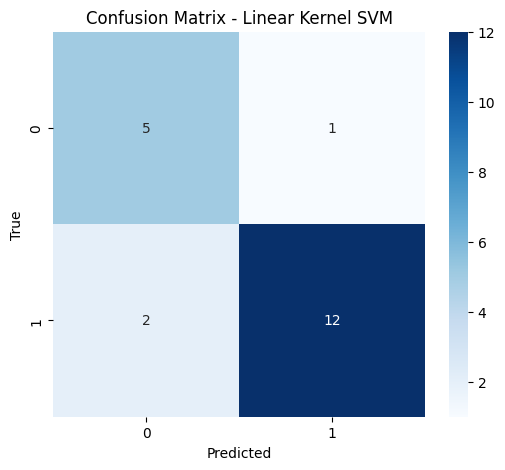

In [4]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)
print("Linear Kernel SVM Accuracy: {:.2f}%".format(acc_linear * 100))
print("Classification Report (Linear Kernel):\n", classification_report(y_test, y_pred_linear))

# Plot confusion matrix for the linear kernel SVM
cm_linear = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_linear, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix - Linear Kernel SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Best gamma from grid search: 0.1
Best cross-validation score (RBF SVM): 93.75%


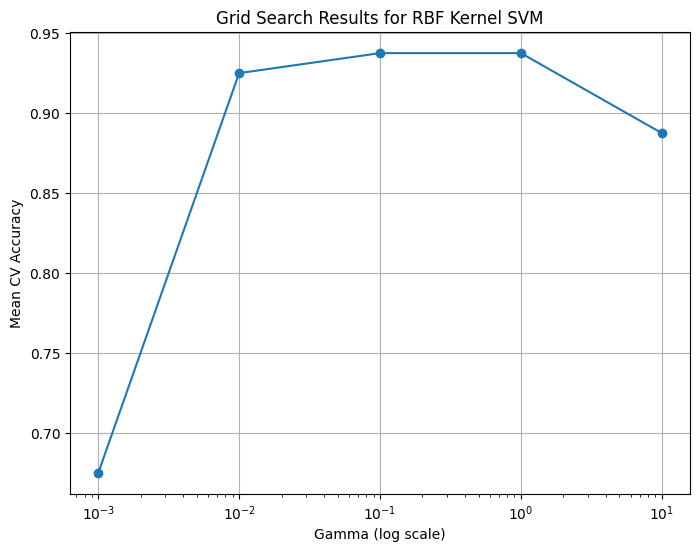

In [5]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10]}
svm_rbf = SVC(kernel='rbf', random_state=42)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(svm_rbf, param_grid, cv=cv, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

best_gamma = grid_search.best_params_['gamma']
best_score = grid_search.best_score_
print("Best gamma from grid search:", best_gamma)
print("Best cross-validation score (RBF SVM): {:.2f}%".format(best_score * 100))

results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(8, 6))
plt.semilogx(param_grid['gamma'], results['mean_test_score'], marker='o', linestyle='-')
plt.xlabel('Gamma (log scale)')
plt.ylabel('Mean CV Accuracy')
plt.title('Grid Search Results for RBF Kernel SVM')
plt.grid(True)
plt.show()

RBF Kernel SVM Test Accuracy: 85.00%
Classification Report (RBF Kernel):
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20



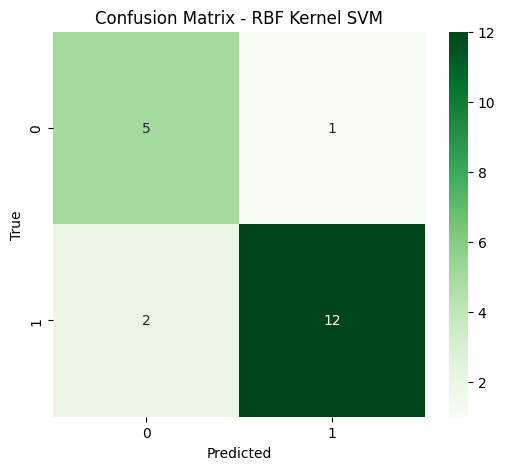

In [6]:

best_svm_rbf = grid_search.best_estimator_
y_pred_rbf = best_svm_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print("RBF Kernel SVM Test Accuracy: {:.2f}%".format(acc_rbf * 100))
print("Classification Report (RBF Kernel):\n", classification_report(y_test, y_pred_rbf))

cm_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap='Greens')
plt.title("Confusion Matrix - RBF Kernel SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
